<a href="https://colab.research.google.com/github/LaloCo/Santander_Customer_Transaction_Prediction/blob/decision-tree/Kaggle_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import os
import tarfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from six.moves import urllib
from sklearn.model_selection import train_test_split

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"lalorosasosorno","key":"f81f7f77554f4d1c6773afa876e7af77"}'}

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c santander-customer-transaction-prediction

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
DOWNLOAD_PATH = os.path.join("/content")
SANTANDER_TRAIN_PATH = DOWNLOAD_PATH + "/train.csv.zip"
SANTANDER_TEST_PATH = DOWNLOAD_PATH + "/test.csv.zip"

In [0]:
import zipfile

def fetch_sandander_data(santander_=DOWNLOAD_PATH, santander_path=SANTANDER_TRAIN_PATH):
    if not os.path.isdir(santander_):
        os.makedirs(santander_)
    with zipfile.ZipFile(santander_path,"r") as zip_ref:
        zip_ref.extractall("/content")

In [0]:
def load_santander_data(file_path=DOWNLOAD_PATH, file_name="train.csv"):
    csv_path = os.path.join(file_path, file_name)
    return pd.read_csv(csv_path)

In [0]:
fetch_sandander_data(DOWNLOAD_PATH, SANTANDER_TRAIN_PATH)
fetch_sandander_data(DOWNLOAD_PATH, SANTANDER_TEST_PATH)
data = load_santander_data()
test_data = load_santander_data(DOWNLOAD_PATH, "test.csv")
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [0]:
test_data.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [0]:
data['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [0]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


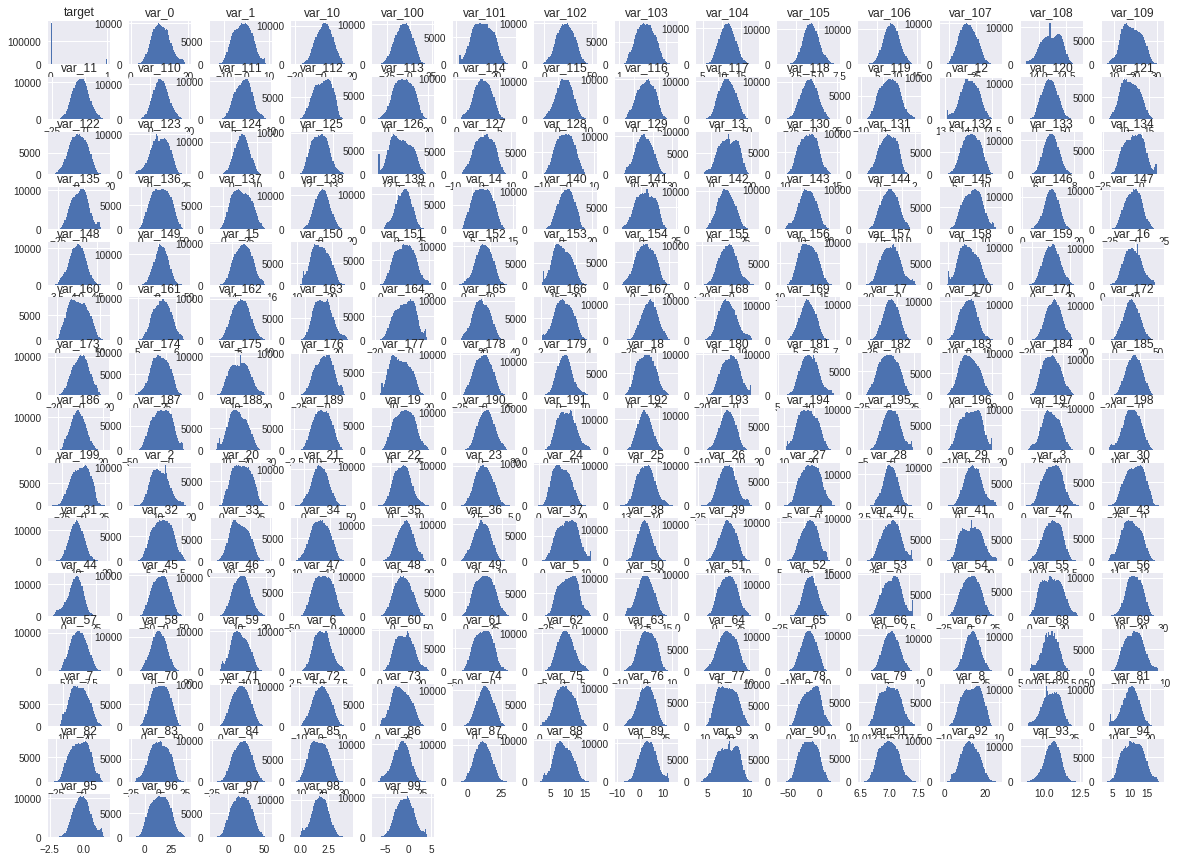

In [0]:
data.hist(bins=50, figsize=(20,15))
plt.show()

In [0]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [0]:
train_set, test_set = split_train_test(data, 0.2)
print(len(train_set))
print(len(test_set))

160000
40000


In [0]:
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))

160000
40000


# Using stratified sampling

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["target"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [0]:
strat_test_set["target"].value_counts() / len(strat_test_set)

0    0.8995
1    0.1005
Name: target, dtype: float64

**using stratified sampling should result in a less skewed sample than using random sampling**

## Discover and visualize the data to gain insights

In [0]:
santander = strat_train_set.copy()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


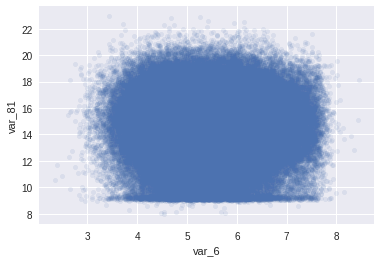

In [0]:
santander.plot(kind="scatter", x="var_6", y="var_81", alpha=0.1)

In [0]:
corr_matrix = santander.corr()
corr_matrix["target"].sort_values(ascending=False)

target     1.000000
var_6      0.067611
var_110    0.065643
var_26     0.063283
var_53     0.063083
var_22     0.059888
var_190    0.057623
var_99     0.057440
var_133    0.056159
var_2      0.055889
var_0      0.052932
var_40     0.050312
var_1      0.049943
var_179    0.049011
var_170    0.048221
var_78     0.047664
var_184    0.046474
var_94     0.045246
var_191    0.045191
var_67     0.044693
var_18     0.043148
var_173    0.042936
var_118    0.041126
var_164    0.040889
var_147    0.040734
var_95     0.039283
var_155    0.039167
var_89     0.038922
var_91     0.036785
var_35     0.036344
             ...   
var_75    -0.038652
var_123   -0.039460
var_127   -0.040333
var_107   -0.040492
var_122   -0.041701
var_192   -0.042442
var_9     -0.042636
var_108   -0.043875
var_33    -0.045436
var_92    -0.046830
var_149   -0.047750
var_169   -0.048460
var_154   -0.048494
var_44    -0.048647
var_115   -0.049227
var_109   -0.051877
var_198   -0.052570
var_165   -0.053658
var_34    -0.054373


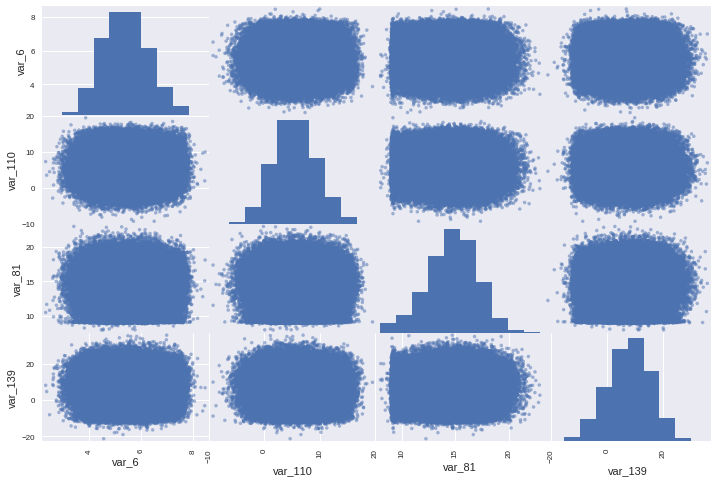

In [0]:
attributes = ["var_6", "var_110", "var_81",
             "var_139"]
pd.plotting.scatter_matrix(santander[attributes], figsize=(12,8));

In [0]:
santander = strat_train_set.drop("target", axis=1)
santander_labels = strat_train_set["target"].copy()

In [0]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
santander_num = santander.drop('ID_code', axis=1)

In [0]:
santander_num

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
172692,15.4140,-2.1016,10.4773,4.8941,12.6506,-3.7205,5.1426,17.7048,4.2444,8.6555,...,-2.8810,8.1647,1.0927,2.1215,17.6536,3.2253,-2.1234,8.9516,13.3485,-16.0178
123366,12.3576,-8.1666,11.7785,2.8869,12.3183,-6.9847,4.2671,9.6710,3.0662,4.8252,...,0.2397,8.1569,-1.0753,5.4679,23.6376,-0.5022,9.2414,8.2427,10.7546,-3.4394
6709,9.4142,-8.6132,7.2196,3.2496,10.6550,-3.3245,5.1010,18.5389,1.8721,9.5959,...,8.1638,9.2399,1.0160,7.4548,17.0933,0.0715,-4.0455,9.4586,17.8789,-13.9784
30154,13.0647,-0.7917,13.0270,8.7865,10.2252,-2.9311,6.7299,11.8682,-2.1274,8.6047,...,9.3914,7.5576,0.4784,1.2138,19.0498,-1.5634,7.3092,8.4344,18.1104,-7.7668
181706,9.5222,-0.2727,8.2173,8.4071,12.7732,-10.3113,4.7486,13.7810,-1.1586,6.3487,...,8.4802,0.9951,3.9973,1.9370,24.4786,-2.0294,-0.5454,8.7461,21.3832,14.1786
73134,8.5366,-3.0227,7.4770,5.1623,11.1218,-4.6545,5.0360,12.2829,3.9469,7.7544,...,8.4860,5.6032,1.3314,2.7867,22.1314,-2.1831,5.0981,9.2084,13.9486,-15.8748
62800,16.6397,7.0388,9.0034,6.4022,10.2653,-14.5044,4.5093,20.0340,1.8682,7.0068,...,2.6931,5.4268,2.0415,0.4827,21.4905,1.4901,-5.0616,10.4085,15.2971,0.6529
87853,9.4600,-0.0468,6.1009,7.9874,11.8543,2.7387,5.6604,17.6221,5.7819,7.7991,...,4.6230,9.7856,2.5896,7.7476,19.0966,-0.1416,2.5228,9.3151,18.3657,12.9272
67390,14.3243,4.3495,9.0913,5.6892,9.5274,4.2939,6.2439,14.4424,4.9840,7.2565,...,-2.0112,2.2007,3.0581,5.7654,15.3110,0.6748,7.3417,8.3962,11.1442,11.1113
35045,13.2781,-5.3255,13.5700,8.9851,8.8604,-4.1937,6.1722,11.5558,6.1954,8.2961,...,-0.8946,7.6232,1.1310,3.4632,20.7667,-0.6041,-0.0297,8.5247,12.3000,-12.8820


In [0]:
imputer.fit(santander_num)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [0]:
imputer.statistics_

array([ 1.052980e+01, -1.623700e+00,  1.058140e+01,  6.829450e+00,
        1.110990e+01, -4.826700e+00,  5.387400e+00,  1.646020e+01,
        3.869000e-01,  7.628500e+00,  4.916000e-01, -3.286050e+00,
        1.402550e+01,  8.606950e+00,  7.520100e+00,  1.457460e+01,
        9.233350e+00, -5.652350e+00,  1.520030e+01,  1.245380e+01,
        1.317320e+01,  1.722230e+01,  4.280600e+00,  3.009400e+00,
        1.038610e+01,  1.366330e+01, -4.193400e+00, -1.139200e+00,
        5.537500e+00,  4.947250e+00, -7.414750e+00,  1.036375e+01,
       -5.053500e-01,  1.457725e+01,  1.143540e+01,  3.935400e+00,
        2.200400e+00,  5.898100e+00,  1.055800e+01,  6.750500e-01,
       -6.620650e+00,  9.159050e+00,  1.124270e+01,  1.156520e+01,
        9.423600e+00, -1.259150e+01,  1.131310e+01, -1.247345e+01,
        1.451610e+01,  1.669385e+01,  1.274575e+01,  1.343340e+01,
       -2.494950e+00,  6.027700e+00,  1.311450e+00,  1.259690e+01,
        1.664610e+01,  6.260700e+00,  3.177650e+00,  8.902100e

In [0]:
santander_num.median().values

array([ 1.052980e+01, -1.623700e+00,  1.058140e+01,  6.829450e+00,
        1.110990e+01, -4.826700e+00,  5.387400e+00,  1.646020e+01,
        3.869000e-01,  7.628500e+00,  4.916000e-01, -3.286050e+00,
        1.402550e+01,  8.606950e+00,  7.520100e+00,  1.457460e+01,
        9.233350e+00, -5.652350e+00,  1.520030e+01,  1.245380e+01,
        1.317320e+01,  1.722230e+01,  4.280600e+00,  3.009400e+00,
        1.038610e+01,  1.366330e+01, -4.193400e+00, -1.139200e+00,
        5.537500e+00,  4.947250e+00, -7.414750e+00,  1.036375e+01,
       -5.053500e-01,  1.457725e+01,  1.143540e+01,  3.935400e+00,
        2.200400e+00,  5.898100e+00,  1.055800e+01,  6.750500e-01,
       -6.620650e+00,  9.159050e+00,  1.124270e+01,  1.156520e+01,
        9.423600e+00, -1.259150e+01,  1.131310e+01, -1.247345e+01,
        1.451610e+01,  1.669385e+01,  1.274575e+01,  1.343340e+01,
       -2.494950e+00,  6.027700e+00,  1.311450e+00,  1.259690e+01,
        1.664610e+01,  6.260700e+00,  3.177650e+00,  8.902100e

In [0]:
X = imputer.transform(santander_num)

In [0]:
santander_tr = pd.DataFrame(X, columns=santander_num.columns)

In [0]:
santander_cat = strat_train_set["target"]
santander_cat.head(10)

172692    0
123366    0
6709      0
30154     0
181706    0
73134     0
62800     1
87853     1
67390     0
35045     0
Name: target, dtype: int64

# Using a Linear Regression

## Training and Evaluating on the Training Set

In [0]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(santander_num, santander_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
some_data = santander_num.iloc[:5]
some_labels = santander_labels.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))

Predictions: [-0.04393666  0.06763042 -0.13893601  0.16025946  0.06455123]


In [0]:
print("Labels:", list(some_labels))

Labels: [0, 0, 0, 0, 0]


### Measure the regression model's RMSE

In [0]:
def binary_step(predictions):
  for i in range(len(predictions)):
    if predictions[i] > 0:
      predictions[i] = 1
    else:
      predictions[i] = 0
  
  return predictions

In [0]:
print("Predictions:", binary_step(lin_reg.predict(some_data)))

Predictions: [0. 1. 0. 1. 1.]


In [0]:
from sklearn.metrics import mean_squared_error
santander_predictions = binary_step(lin_reg.predict(santander_num))
lin_mse = mean_squared_error(santander_labels, santander_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.8281417451137215

# Using a Decision Tree
Apparently the error is too high for the regression model, let's try with a decision tree instead

In [0]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(santander_num, santander_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
santander_predictions = tree_reg.predict(santander_num)
tree_mse = mean_squared_error(santander_labels, santander_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Cross-Validation

In [0]:
'''from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, santander_num, santander_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)'''

'from sklearn.model_selection import cross_val_score\nscores = cross_val_score(tree_reg, santander_num, santander_labels,\n                         scoring="neg_mean_squared_error", cv=10)\ntree_rmse_scores = np.sqrt(-scores)'

In [0]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [0]:
#display_scores(tree_rmse_scores)

In [0]:
'''lin_scores = cross_val_score(lin_reg, santander_num, santander_labels,
                             scoring="neg_mean_squared_error", cv=10)'''

'lin_scores = cross_val_score(lin_reg, santander_num, santander_labels,\n                             scoring="neg_mean_squared_error", cv=10)'

In [0]:
'''lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)'''

'lin_rmse_scores = np.sqrt(-lin_scores)\ndisplay_scores(lin_rmse_scores)'

# Using a Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(santander_num, santander_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [0]:
santander_predictions = forest_reg.predict(santander_num)
forest_mse = mean_squared_error(santander_labels, santander_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.12500674981775983

In [0]:
'''forest_scores = cross_val_score(forest_reg, santander_num, santander_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)'''

'forest_scores = cross_val_score(forest_reg, santander_num, santander_labels,\n                         scoring="neg_mean_squared_error", cv=10)\nforest_rmse_scores = np.sqrt(-forest_scores)\ndisplay_scores(forest_rmse_scores)'

### Saving the models

In [0]:
from sklearn.externals import joblib

joblib.dump(lin_reg, "linear_regression.pkl")
joblib.dump(tree_reg, "decision_tree.pkl")
joblib.dump(forest_reg, "random_forest.pkl")

['random_forest.pkl']

### Retrieving models

In [0]:
lin_reg = joblib.load("linear_regression.pkl")
tree_reg = joblib.load("decision_tree.pkl")
forest_reg = joblib.load("random_forest.pkl")

### Fine-tuning the model

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(santander_num, santander_labels)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [0]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [0]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.3371747403877633 {'max_features': 2, 'n_estimators': 3}
0.3013035222163857 {'max_features': 2, 'n_estimators': 10}
0.29130077049140957 {'max_features': 2, 'n_estimators': 30}
0.33403259987279355 {'max_features': 4, 'n_estimators': 3}
0.29826131579539444 {'max_features': 4, 'n_estimators': 10}
0.28785042653356546 {'max_features': 4, 'n_estimators': 30}
0.33248642411716933 {'max_features': 6, 'n_estimators': 3}
0.29752058752294774 {'max_features': 6, 'n_estimators': 10}
0.2859754870031113 {'max_features': 6, 'n_estimators': 30}
0.33151273647394675 {'max_features': 8, 'n_estimators': 3}
0.29617055896898326 {'max_features': 8, 'n_estimators': 10}
0.2849262575162602 {'max_features': 8, 'n_estimators': 30}
0.335816790328695 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.3005350437137074 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.3330696874029017 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.2984178069418781 {'bootstrap': False, 'max_features'

## Analyze the Best Models and Their Errors

In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.0062655 , 0.00614844, 0.00684827, 0.00420448, 0.00419765,
       0.00512171, 0.00716121, 0.00398401, 0.004402  , 0.00528419,
       0.00387085, 0.00464792, 0.00903044, 0.00636239, 0.0036836 ,
       0.00449944, 0.00432658, 0.00407052, 0.00568527, 0.00440749,
       0.00446865, 0.00638536, 0.00775216, 0.0041526 , 0.00413712,
       0.00406495, 0.00735297, 0.00412851, 0.00431622, 0.0041695 ,
       0.00403088, 0.00412177, 0.0049505 , 0.00628101, 0.00606788,
       0.00501954, 0.00484982, 0.00448027, 0.00408471, 0.0039486 ,
       0.00648825, 0.00452589, 0.00413448, 0.00502721, 0.00664525,
       0.00409856, 0.00421639, 0.00420025, 0.00436382, 0.0049355 ,
       0.00444973, 0.00507058, 0.00442315, 0.00768784, 0.00390537,
       0.00470958, 0.00501008, 0.00416008, 0.00445786, 0.00408908,
       0.00438577, 0.00402394, 0.00418293, 0.00431371, 0.00428459,
       0.0041009 , 0.00410262, 0.00514497, 0.00430193, 0.00457704,
       0.00437512, 0.00482705, 0.00417084, 0.0039275 , 0.00408

In [0]:
strat_test_set

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199837,train_199837,0,8.7757,6.7905,9.2920,4.8443,10.8877,3.5858,4.7267,14.1264,...,4.8996,4.4960,2.0201,5.0578,18.7864,-0.2550,4.0958,7.9291,17.6055,-7.4019
149409,train_149409,0,7.5491,-8.4764,15.4626,3.6803,12.1527,-7.1858,5.1952,13.7568,...,10.2822,11.9053,3.0869,-0.6879,22.3453,-2.1595,4.1147,9.2685,12.2069,1.3086
43642,train_43642,0,5.8385,-6.9177,8.1589,6.7591,9.0635,4.9003,4.7126,21.1854,...,0.0732,10.2627,-0.3105,6.8481,15.2119,-0.5050,1.8873,8.6977,18.6569,11.5001
157332,train_157332,0,15.6901,-7.7904,8.3676,6.3246,9.8144,6.9361,4.5284,11.7888,...,11.8331,4.3828,2.9730,2.4989,18.6336,1.0621,-3.8953,8.7950,12.9313,-3.1393
189470,train_189470,0,15.5726,-6.6387,12.0251,7.2093,10.3838,-8.9961,4.8868,18.8259,...,7.9042,10.4118,3.3438,0.4358,16.0511,0.7758,-3.3334,7.7918,18.2619,-3.2074
40518,train_40518,0,10.0049,-7.0811,9.0320,5.7876,12.4728,0.3626,4.0518,16.0731,...,2.7496,7.7542,1.7243,3.3230,14.4790,-0.4519,7.1568,7.9872,14.5960,-14.5011
128319,train_128319,0,7.4503,4.0426,9.3875,6.1656,10.7851,-9.3521,4.7262,16.0986,...,7.4595,7.6165,4.8343,5.4573,13.7128,0.5389,5.6660,8.9967,18.0636,-5.8582
162220,train_162220,0,17.7583,0.0683,12.8062,8.7604,13.5144,1.3559,5.2224,17.4751,...,7.7077,8.9660,2.2424,-0.1223,20.7521,1.0682,-5.0307,7.0267,21.1513,-7.7998
119266,train_119266,0,9.8938,3.2772,7.3361,4.5231,10.3673,-15.0466,5.4942,14.3117,...,-5.9993,4.7954,3.1247,4.0448,13.4190,1.1452,10.5326,8.9165,8.4777,-11.3829
161437,train_161437,0,10.9490,2.5571,14.2648,7.0967,9.9072,-1.9592,5.6623,18.1510,...,3.9450,3.2566,0.6944,2.7026,20.0868,0.5384,-3.1426,8.4169,18.2002,10.2066


In [0]:
final_model = grid_search.best_estimator_

strat_test_set = strat_test_set.drop("ID_code", axis=1)
X_test = strat_test_set.drop("target", axis=1)
y_test = strat_test_set["target"].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [0]:
final_predictions

array([0.        , 0.06666667, 0.        , ..., 0.13333333, 0.13333333,
       0.1       ])

# Use Test data

In [0]:
final_model = grid_search.best_estimator_

X_test = test_data.drop("ID_code", axis=1)

final_predictions = final_model.predict(X_test)

final_predictions

array([0.2       , 0.06666667, 0.16666667, ..., 0.1       , 0.13333333,
       0.03333333])

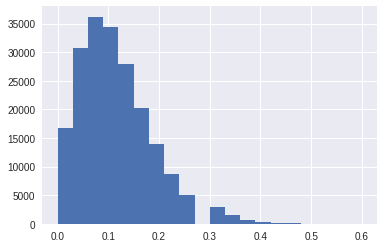

In [0]:
plt.hist(final_predictions, bins = 20);

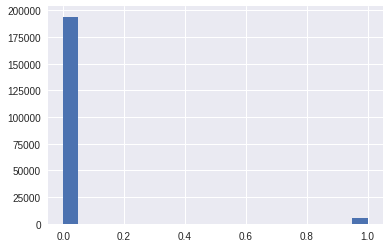

In [0]:
submission = []
for i in range(len(final_predictions)):
  if final_predictions[i] >= 0.3:
    final_predictions[i] = 1
    submission.append(["test_{}".format(i), 1])
  else:
    final_predictions[i] = 0
    submission.append(["test_{}".format(i), 0])
    
plt.hist(final_predictions, bins = 20);

In [0]:
submission

[['test_0', 0],
 ['test_1', 0],
 ['test_2', 0],
 ['test_3', 0],
 ['test_4', 0],
 ['test_5', 0],
 ['test_6', 0],
 ['test_7', 0],
 ['test_8', 0],
 ['test_9', 0],
 ['test_10', 0],
 ['test_11', 0],
 ['test_12', 0],
 ['test_13', 0],
 ['test_14', 0],
 ['test_15', 0],
 ['test_16', 0],
 ['test_17', 0],
 ['test_18', 0],
 ['test_19', 0],
 ['test_20', 0],
 ['test_21', 0],
 ['test_22', 0],
 ['test_23', 0],
 ['test_24', 0],
 ['test_25', 0],
 ['test_26', 0],
 ['test_27', 0],
 ['test_28', 0],
 ['test_29', 0],
 ['test_30', 0],
 ['test_31', 0],
 ['test_32', 0],
 ['test_33', 0],
 ['test_34', 0],
 ['test_35', 0],
 ['test_36', 0],
 ['test_37', 0],
 ['test_38', 0],
 ['test_39', 0],
 ['test_40', 0],
 ['test_41', 0],
 ['test_42', 0],
 ['test_43', 0],
 ['test_44', 0],
 ['test_45', 0],
 ['test_46', 0],
 ['test_47', 0],
 ['test_48', 0],
 ['test_49', 0],
 ['test_50', 0],
 ['test_51', 0],
 ['test_52', 0],
 ['test_53', 0],
 ['test_54', 0],
 ['test_55', 0],
 ['test_56', 0],
 ['test_57', 0],
 ['test_58', 0],
 ['test

In [0]:
a = np.asarray(submission)
np.savetxt("submission.csv", a, fmt="%s,%s", delimiter=",", header="ID_code,target")

In [0]:
files.download("submission.csv")